---
title: "3.1-Logistic Regression"
author: "Ahmed Aredah"
date: "10.30.2023"
output: html_document
editor: visual
categories:
    Classification
---

## Mathematical Formulation

When modeling the relationship between a dependent variable $y$ and multiple independent variables $x_1, x_2, \dots, x_n$, the logistic function can be written as:

\begin{equation}
y_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_n x_{in})}}
\end{equation}


where:

-   $y_i$ is the observed value of the dependent variable for the $i^{th}$ observation.

-   $x_1, x_2, \dots, x_n$ are the values of the independent variables for the $i^{th}$ observation.

-   $\beta_0, \beta_1, \beta_n$ are the regression coefficients, with $\beta_0$ being the y-intercept.

The goal of logistic regression is to find the values of $\beta_0, \beta_1, \dots, \beta_n$ that maximize the likelihood of the observed data. This is often done using a method known as maximum likelihood estimation (MLE).

### Matrix Notation

Given:

-   $\boldsymbol{X}$ is the design matrix of size $m \times (n + 1)$.

-   $\boldsymbol{y}$ is a column vector of size $m \times 1$ containing the dependent variable values.

-   $\boldsymbol{\beta}$ is a column vector of size $(n + 1) \times 1$ containing the regression coefficients.

-   $\boldsymbol{\epsilon}$ is a column vector of size $m \times 1$ representing the errors.

The relationship can be represented as:

$$
\large{y} = \frac{1}{1 + e^{-(\mathbf{X}\boldsymbol{\beta})}}
$$

The likelihood of the observed data given the model parameters can be written as:

$$
L(\boldsymbol{\beta}) = \prod_{i=1}^m p(y_i | \mathbf{x}_i, \boldsymbol{\beta})
$$

where $p(y_i | \mathbf{x}_i, \boldsymbol{\beta})$ is the probability of observing $y_i$ given the independent variables $\mathbf{x}_i$ and the model parameters $\boldsymbol{\beta}$. The goal of MLE is to find the values of $\boldsymbol{\beta}$ that maximize $L(\boldsymbol{\beta})$.

### Log Likelihood

Since the likelihood $L(\boldsymbol{\beta})$ is a product of many small numbers, it can be more convenient to work with the log likelihood, which is the natural logarithm of the likelihood:

$$
\log L(\boldsymbol{\beta}) = \sum_{i=1}^m \log p(y_i | \mathbf{x}_i, \boldsymbol{\beta})
$$

The log likelihood can be maximized using various optimization algorithms, such as gradient ascent or Newton's method.

## Application on the Breast Cancer Wisconsin Dataset

Now that we have an understanding of logistic regression, let's apply these concepts to the Breast Cancer Wisconsin dataset. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, and the goal is to classify the mass as benign or malignant. Stay tuned for a deep dive into the analysis and insights we can extract from this dataset!

In [34]:
#import required libraries
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


#inline plots
%matplotlib inline

# Set Seaborn style to "whitegrid" for a white background with grid lines
sns.set_style("whitegrid")

#supress warnings!
warnings.simplefilter(action='ignore', category=Warning)
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print("required libraries loaded successfully!")

required libraries loaded successfully!


In [35]:
#| echo: false
# Set the background color to black and axis label color to white
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'

In [36]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert the data to a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = LogisticRegression(random_state=42, max_iter=10000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation scores: [0.95604396 0.95604396 0.96703297 0.96703297 0.92307692]
Average cross-validation score: 0.9538461538461538
Accuracy: 0.956140350877193


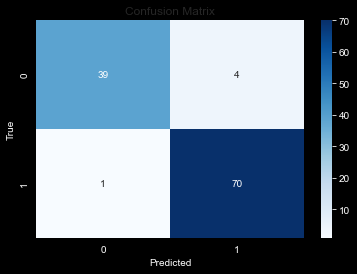

In [38]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The given confusion matrix represents the performance of a classification model on the breast cancer dataset from the sklearn library.

From the matrix:

The model correctly predicted 39 instances as class 0 (True Negative) and 70 instances as class 1 (True Positive).
There were 4 instances where the model incorrectly predicted class 1 when the actual class was 0 (False Positive).
Similarly, there was 1 instance where the model incorrectly predicted class 0 when the actual class was 1 (False Negative).
In summary, the model has a high number of true predictions and a low number of false predictions, indicating a good classification performance for this dataset.

**let's reduce the x dimensionality to be able to visualize it on a simple plot**

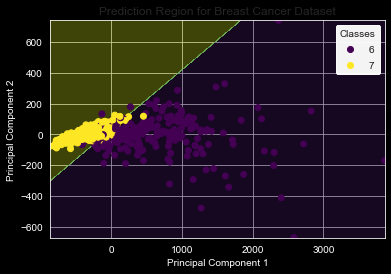

In [43]:
# Reduce the dimensionality of the dataset to 2 dimensions using PCA so we can visualize it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = LogisticRegression(random_state=42, max_iter=10000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Create a meshgrid for the plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Get the predictions for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the prediction region
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y+6, cmap='viridis')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title='Classes')
plt.gca().add_artist(legend)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Prediction Region for Breast Cancer Dataset')
plt.show()
